In [39]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
NR_data = pd.read_csv("s1_pulse.txt", sep = " ", header = None )

In [41]:
NR_data.drop([55,56], axis = 1, inplace = True)

In [42]:
NR_data.columns=["event_id" if x == 0 else x for x in range(55)]
target_1 = [1 for x in range(78423)]
NR_data['target'] = target_1
name_1 = ["NR" for x in range(78423)]
NR_data['name'] = name_1

In [43]:
ER_data = pd.read_csv("s1_pulse_ER.txt", sep = " ", header = None )
ER_data.drop([55,56], axis = 1, inplace = True)
ER_data = ER_data[:78423]
ER_data.columns=["event_id" if x == 0 else x for x in range(55)]

In [44]:
target_0 = [0 for x in range(78423)]
ER_data['target'] = target_0
name_0 = ['ER' for x in range(78423)]
ER_data['name'] = name_0

In [45]:
frames = [NR_data, ER_data]
data = pd.concat(frames)
print(data)

       event_id          1         2         3          4          5  \
0            50    40.3327  0.293234  1.120830   2.153040   3.130260   
1            95   281.4470  0.317676  2.084840   7.567450  18.011700   
2           148   112.1950  0.054925  1.108000   2.923330   5.546050   
3           157   965.0290  0.306961  2.462740   9.684170  22.929900   
4           168   613.9680  0.310206  0.856616   2.111710   5.704370   
5           173    19.2203  0.205352  0.650330   1.373500   2.121460   
6           182   189.1110  0.038178  0.507913   1.811640   4.347060   
7           206    92.9801  0.365706  1.839950   5.215560  11.327200   
8           231    31.0673  0.054003  0.364023   0.993096   2.256690   
9           252    96.4507  0.092600  1.031880   3.703980   8.092210   
10          295    47.4353  0.011523  0.692160   2.506470   5.697810   
11          335   395.6810  0.104306  1.578860   7.318490  20.959900   
12          365    31.7087  0.360364  1.024210   1.881350   2.73

In [46]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data.iloc[:, 2:55], data['target'], test_size = 0.3, random_state = 0)
print(train_data)
print(test_data)
print(train_labels)
print(test_labels)

             2         3         4         5          6          7   \
74211  0.061249  1.744800   9.77581  30.44130   68.72840  127.43600   
54947  0.113639  0.834535   5.38946  20.88020   55.54330  111.00900   
33369  0.146179  0.770747   3.01281   6.97159   11.74180   15.82450   
15900  0.089107  1.019570   5.70739  16.63370   35.23980   62.96080   
39898  0.274365  1.186210   4.85006  14.95410   34.51230   64.77220   
16681  0.572360  4.658130  21.27160  60.51970  126.09900  211.36500   
58245  0.322791  1.846920   5.29705  11.50080   18.76870   26.30480   
7876  -0.101862  0.951406   8.09700  26.18370   54.25710   90.66510   
65874  0.376264  2.519300   7.43281  15.44300   25.21390   34.92180   
42315  0.118297  0.546934   1.38927   2.73032    5.50733    9.33940   
37979  0.170133  0.723601   2.42810   6.25637   13.25240   23.55750   
60407 -0.028797  0.721998   2.98060   5.87280    9.67831   15.76290   
11453  0.064751  0.371412   1.26408   3.33409    9.41301   20.69420   
51610 

In [47]:
from sklearn import datasets, metrics, tree 
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [48]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.99062778934840823

In [49]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [50]:
feature_importance = clf.feature_importances_
print(feature_importance)

[  5.63861858e-04   7.70300126e-04   4.39040102e-04   3.18872592e-04
   3.57438711e-04   4.59562786e-04   2.45163549e-04   7.07219219e-04
   2.32337652e-04   2.17688321e-04   1.29428082e-02   4.53474950e-04
   1.18272847e-03   8.74614584e-04   1.39903943e-04   1.04756379e-02
   3.69483501e-04   3.29840981e-02   2.28533149e-03   9.14278694e-04
   1.44667588e-01   1.37198131e-02   1.44875314e-03   2.15698784e-03
   1.47844040e-03   3.44033306e-04   5.09758511e-04   6.25277434e-04
   9.31681779e-04   2.32965349e-04   4.18987288e-04   3.61129405e-04
   1.46969243e-04   1.89397546e-04   3.55222488e-04   1.24228445e-03
   1.35351182e-03   1.11229703e-04   2.86088400e-04   3.24020493e-04
   1.41241434e-04   3.98276559e-05   6.04191689e-05   2.66857455e-04
   2.89895590e-05   4.75792094e-04   2.89470736e-04   8.19938951e-03
   3.88162955e-04   4.02524690e-04   1.12427284e-03   3.90332711e-03
   7.46841740e-01]


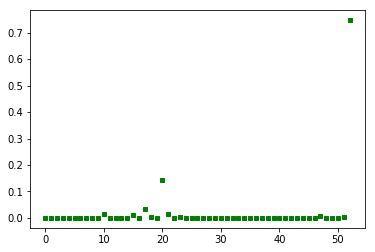

In [51]:
plt.plot([x for x in range(53)],feature_importance,'gs',ms = 4.)

In [52]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)
clf1.fit(train_data,train_labels)
predicted_probabilities = clf1.predict_proba(test_data[:])

([array([  7.07378756,   0.        ,   0.        ,   0.        ,
           0.        ,  19.66251541,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.30815659,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.27096527,
           8.75483487,  13.9297403 ]),
  array([ 13.9297403 ,   8.75483487,   0.27096527,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.30815659,   0.        , 

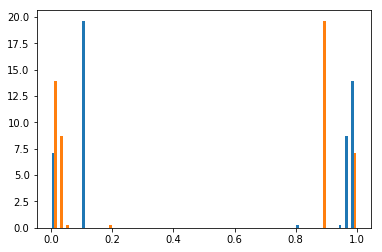

In [53]:
plt.hist(predicted_probabilities,bins=50, normed = True)

In [54]:
predictions1 = clf1.predict(test_data)
metrics.accuracy_score(test_labels, predictions1)

0.94797466740340885

In [55]:
import seaborn as sns

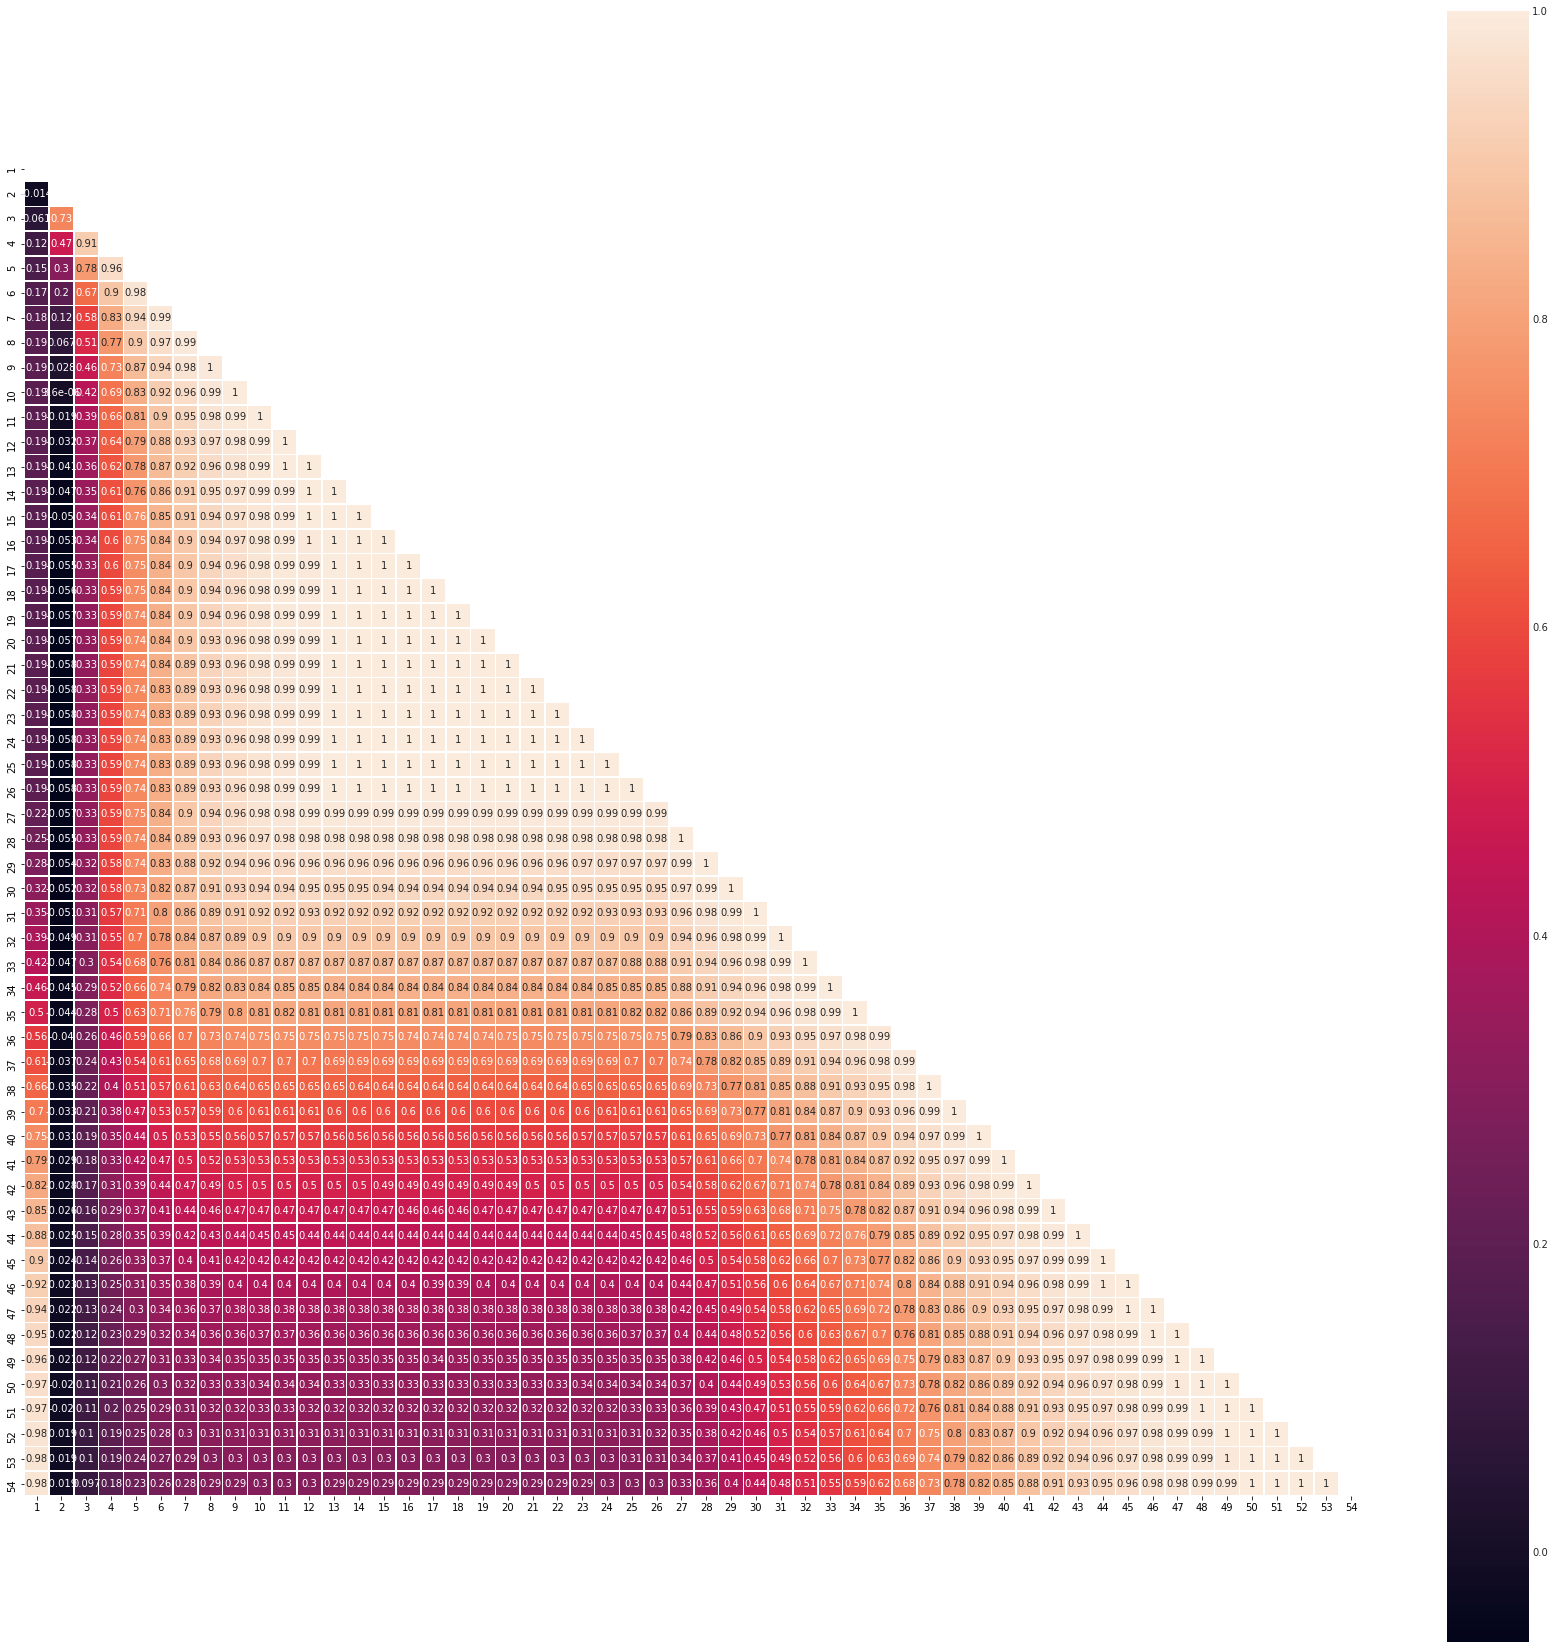

In [56]:
corr = data.iloc[:,1:55].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(30,30))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=True, annot=True, linewidths=0.5)

#### mean absolute error

In [57]:
metrics.mean_absolute_error(test_labels, predictions)

0.0093722106515917881

#### mean squared error

In [58]:
metrics.mean_squared_error(test_labels, predictions)

0.0093722106515917881

#### precision, recall 

In [59]:
metrics.precision_score(test_labels, predictions)

0.98953508320466632

In [60]:
metrics.recall_score(test_labels, predictions)

0.99153380033520988

#### ROC curve (for classifier clf1)

In [61]:
fpr, tpr, _ = metrics.roc_curve(test_labels, predicted_probabilities[:,1])

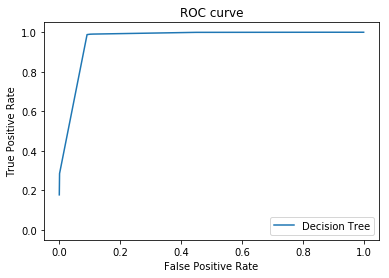

In [62]:
pylab.plot(fpr, tpr, label = 'Decision Tree')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [63]:
data.keys()

Index([u'event_id',           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,          13,          14,
                15,          16,          17,          18,          19,
                20,          21,          22,          23,          24,
                25,          26,          27,          28,          29,
                30,          31,          32,          33,          34,
                35,          36,          37,          38,          39,
                40,          41,          42,          43,          44,
                45,          46,          47,          48,          49,
                50,          51,          52,          53,          54,
         u'target',     u'name'],
      dtype='object')

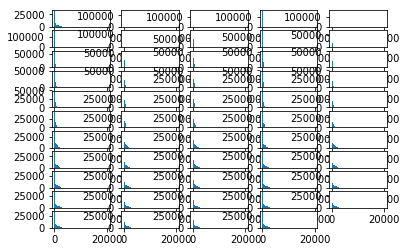

In [64]:
plot_number = 0
for point_number in range(1,55):
        plot_number += 1
        pyplot.subplot(11, 5, plot_number)
        pyplot.hist(data.iloc[:,point_number],200,(0,20000))
        pyplot.xlabel('')
        pyplot.ylabel('')

In [65]:
#f = open('target_for_ambe.txt', 'w')
#f.write(data.iloc[:,0:1])

In [66]:
AMBE_test_data = pd.read_csv("test_ambe_10percent.txt", sep = " ", header = None )

In [67]:
AMBE_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1,413.7060,0.137263,1.647690,8.48349,23.98800,48.61820,79.21730,110.46300,138.24100,...,388.3300,390.9220,391.5180,393.5070,394.8210,398.1170,398.1670,398.9380,399.1990,NaN
1,3,14.3902,0.133661,0.800714,1.90139,2.65641,3.08232,3.21391,3.40019,3.64747,...,13.9898,13.8497,13.9767,13.8265,14.0418,13.8217,13.9289,13.9722,14.3819,NaN
2,10,300.4460,0.217912,1.081290,3.21742,7.25622,14.68440,26.25910,39.64480,51.32850,...,269.9840,271.3580,274.4810,277.0600,276.9140,279.3080,281.5460,287.8140,289.9310,NaN
3,12,911.5510,0.015614,0.704175,4.91857,22.38170,61.67770,123.01400,201.41100,287.69500,...,890.1490,891.5960,891.7100,891.7500,892.9510,892.8740,892.8510,895.2520,896.3730,NaN
4,16,384.1080,0.159507,1.077730,4.92202,16.20790,38.07210,70.23270,107.30800,141.99700,...,364.8570,365.5500,365.3820,365.5320,366.4360,366.3170,366.4440,366.4090,366.5510,NaN


In [68]:
AMBE_test_data_0 = AMBE_test_data.drop([0,1,55], axis = 1)
AMBE_test_data_0.head()

,2,3,4,5,6,7,8,9,10,11,...,45,46,47,48,49,50,51,52,53,54
0,0.137263,1.647690,8.48349,23.98800,48.61820,79.21730,110.46300,138.24100,162.43900,182.16300,...,386.0230,388.3300,390.9220,391.5180,393.5070,394.8210,398.1170,398.1670,398.9380,399.1990
1,0.133661,0.800714,1.90139,2.65641,3.08232,3.21391,3.40019,3.64747,3.88177,4.21624,...,13.7485,13.9898,13.8497,13.9767,13.8265,14.0418,13.8217,13.9289,13.9722,14.3819
2,0.217912,1.081290,3.21742,7.25622,14.68440,26.25910,39.64480,51.32850,59.77020,65.60220,...,261.1660,269.9840,271.3580,274.4810,277.0600,276.9140,279.3080,281.5460,287.8140,289.9310
3,0.015614,0.704175,4.91857,22.38170,61.67770,123.01400,201.41100,287.69500,371.41100,445.31800,...,889.4660,890.1490,891.5960,891.7100,891.7500,892.9510,892.8740,892.8510,895.2520,896.3730
4,0.159507,1.077730,4.92202,16.20790,38.07210,70.23270,107.30800,141.99700,171.31200,194.18300,...,364.9020,364.8570,365.5500,365.3820,365.5320,366.4360,366.3170,366.4440,366.4090,366.5510


In [69]:
AMBE_test_data_0.columns=["event_id" if x == 0 else x for x in range(53)]

In [70]:
predictions_AMBE = clf.predict(AMBE_test_data_0)

In [71]:
type(predictions_AMBE)

numpy.ndarray

In [72]:
print(predictions_AMBE)

[1 0 0 ..., 1 0 1]


In [73]:
df = pd.DataFrame(predictions_AMBE)
df['event_id'] = AMBE_test_data.iloc[:, 0]

In [74]:
df.head()

,0,event_id
0,1,1
1,0,3
2,0,10
3,1,12
4,1,16


In [75]:
df.to_csv(r'output_ambe.txt', mode = 'w', header = False, sep = ' ', index_label = False)